In [3]:
#lets import the libraries first
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score
import os 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount("/content/gdrive")




Mounted at /content/gdrive


In [4]:
dt = pd.read_csv('/content/gdrive/My Drive/diabetes.csv')


**Exploratory Data Analysis**

Head of DataSet

In [5]:
dt.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
dt.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0
768,1,85,66,29,0,26.6,0.351,31,0


In [7]:
dt.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
213,0,140,65,26,130,42.6,0.431,24,1
345,8,126,88,36,108,38.5,0.349,49,0
371,0,118,64,23,89,0.0,1.731,21,0
226,0,101,76,0,0,35.7,0.198,26,0
105,1,126,56,29,152,28.7,0.801,21,0
126,3,120,70,30,135,42.9,0.452,30,0
648,11,136,84,35,130,28.3,0.260,42,1
629,4,94,65,22,0,24.7,0.148,21,0
219,5,112,66,0,0,37.8,0.261,41,1
232,1,79,80,25,37,25.4,0.583,22,0


Shape of Dataset

In [8]:
dt.shape

(769, 9)

List of types of columns in dataset

In [9]:
dt.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Info Of The Dataset

In [10]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               769 non-null    int64  
 1   Glucose                   769 non-null    int64  
 2   BloodPressure             769 non-null    int64  
 3   SkinThickness             769 non-null    int64  
 4   Insulin                   769 non-null    int64  
 5   BMI                       769 non-null    float64
 6   DiabetesPedigreeFunction  769 non-null    float64
 7   Age                       769 non-null    int64  
 8   Outcome                   769 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.2 KB


Summary of the DataCell

In [11]:
dt.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000
mean,3.841352,120.847854,69.101430,20.547464,79.695709,31.985566,0.471719,33.237971,0.348505
std,3.368946,31.978003,19.343526,15.944750,115.204894,7.881425,0.331142,11.752850,0.476807
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,29.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.000000,36.600000,0.626000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Observation

The minimum value of the columns ( Glucose, BloodPressure, SkinThickness, Insulin, BMI) is 0. It is clear that these values cant be zero. So, we impute mean values of these respective columns instead zero.

**Data Cleaning**

Drop Duplicates

In [12]:
dt.shape

(769, 9)

In [13]:
dt.drop_duplicates(keep='first')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [14]:
dt.shape

(769, 9)

Checking null values

In [15]:
dt.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
dt.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

To check number of 0's in dataset

In [17]:
print("Number of Zeroes in Glucose: ",dt[dt['Glucose']==0].shape[0])

Number of Zeroes in Glucose:  5


In [18]:
print("Number of Zeroes in Bloodpresure: ",dt[dt['BloodPressure']==0].shape[0])

Number of Zeroes in Bloodpresure:  35


In [19]:
print("Number of Zeroes in SkinThickness: ",dt[dt['SkinThickness']==0].shape[0])

Number of Zeroes in SkinThickness:  227


In [20]:
print("Number of Zeroes in Insulin: ",dt[dt['Insulin']==0].shape[0])

Number of Zeroes in Insulin:  375


In [21]:
print("Number of Zeroes in BMI: ",dt[dt['BMI']==0].shape[0])

Number of Zeroes in BMI:  11


Replace Number of Zero's with Mean Value of that column

In [22]:
dt['Glucose'] = dt['Glucose'].replace(0,dt['Glucose'].mean())
print("Number of Zeroes in Glucose: ",dt[dt['Glucose']==0].shape[0])

Number of Zeroes in Glucose:  0


In [23]:
dt['BloodPressure'] = dt['BloodPressure'].replace(0,dt['BloodPressure'].mean())
print("Number of Zeroes in BloodPressure: ",dt[dt['BloodPressure']==0].shape[0])

Number of Zeroes in BloodPressure:  0


In [24]:
dt['SkinThickness'] = dt['SkinThickness'].replace(0,dt['SkinThickness'].mean())
print("Number of Zeroes in Skinthickness: ",dt[dt['SkinThickness']==0].shape[0])

Number of Zeroes in Skinthickness:  0


In [25]:
dt['Insulin'] = dt['Insulin'] .replace(0,dt['Insulin'] .mean())
print("Number of Zeroes in Insulin: ",dt[dt['Insulin'] ==0].shape[0])

Number of Zeroes in Insulin:  0


In [26]:
dt['BMI'] = dt['BMI'] .replace(0,dt['BMI'] .mean())
print("Number of Zeroes in BMI: ",dt[dt['BMI'] ==0].shape[0])

Number of Zeroes in BMI:  0


In [27]:
dt.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000
mean,3.841352,121.633601,72.246489,26.612841,118.559026,32.443097,0.471719,33.237971,0.348505
std,3.368946,30.444951,12.110189,9.623304,93.051444,6.874141,0.331142,11.752850,0.476807
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,20.547464,79.695709,27.500000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.695709,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.000000,36.600000,0.626000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**DATA VISUALIZATION**

In [28]:
#CountPlot

Negative (0): 501
Positive (1):  268


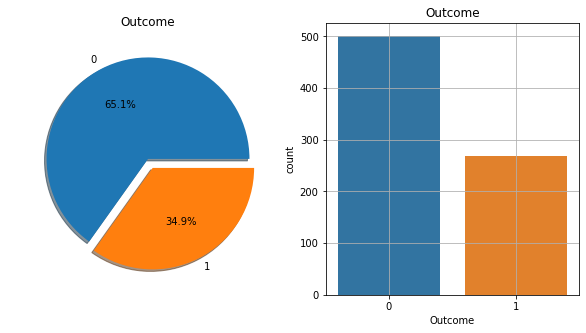

In [29]:
f,ax = plt.subplots(1,2,figsize=(10,5))
dt['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel(" ")
sns.countplot('Outcome', data=dt,ax=ax[1])
ax[1].set_title('Outcome')
N,P = dt['Outcome'].value_counts()
print("Negative (0):", N)
print("Positive (1): ",P)
plt.grid()
plt.show()

**Histogram**

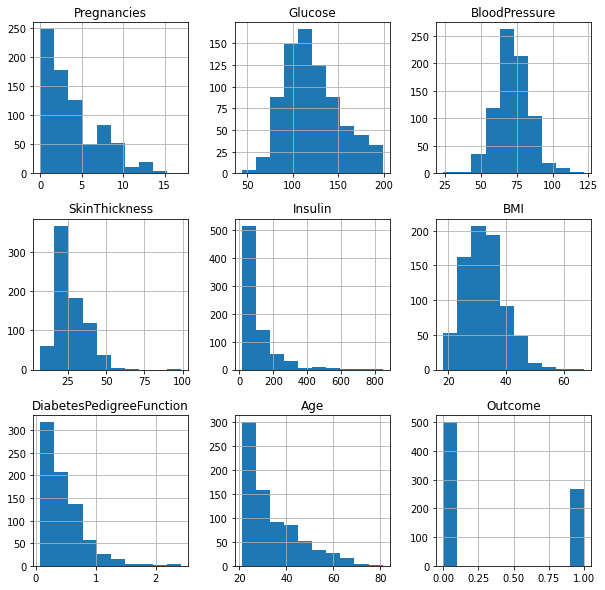

In [30]:
dt.hist(bins=10,figsize=(10,10))
plt.show()

Scatter Plot

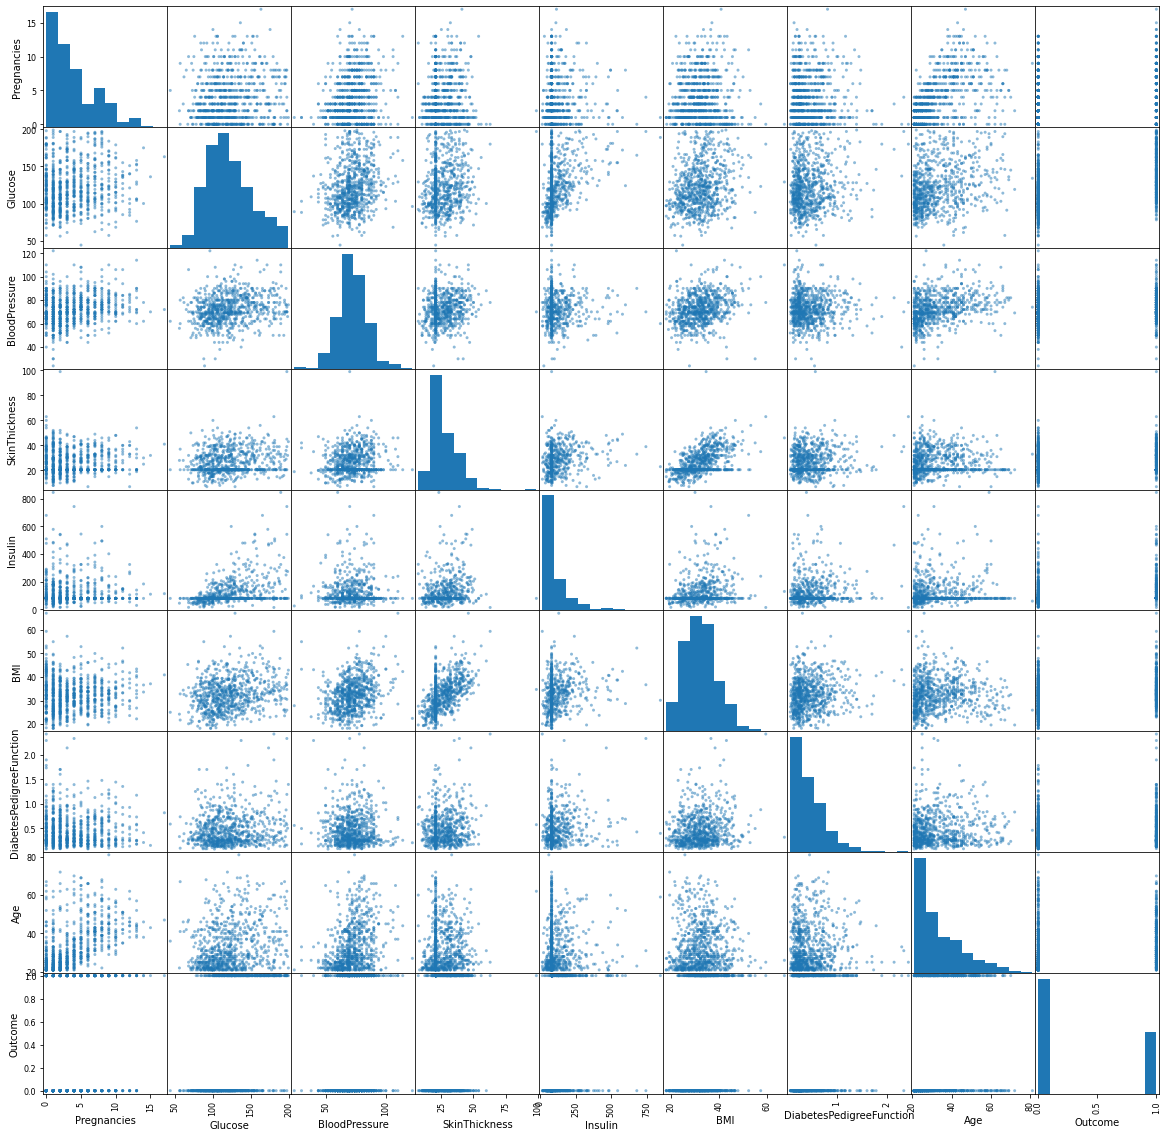

In [31]:
from pandas.plotting import scatter_matrix
scatter_matrix(dt,figsize=(20,20));

Pair Plot

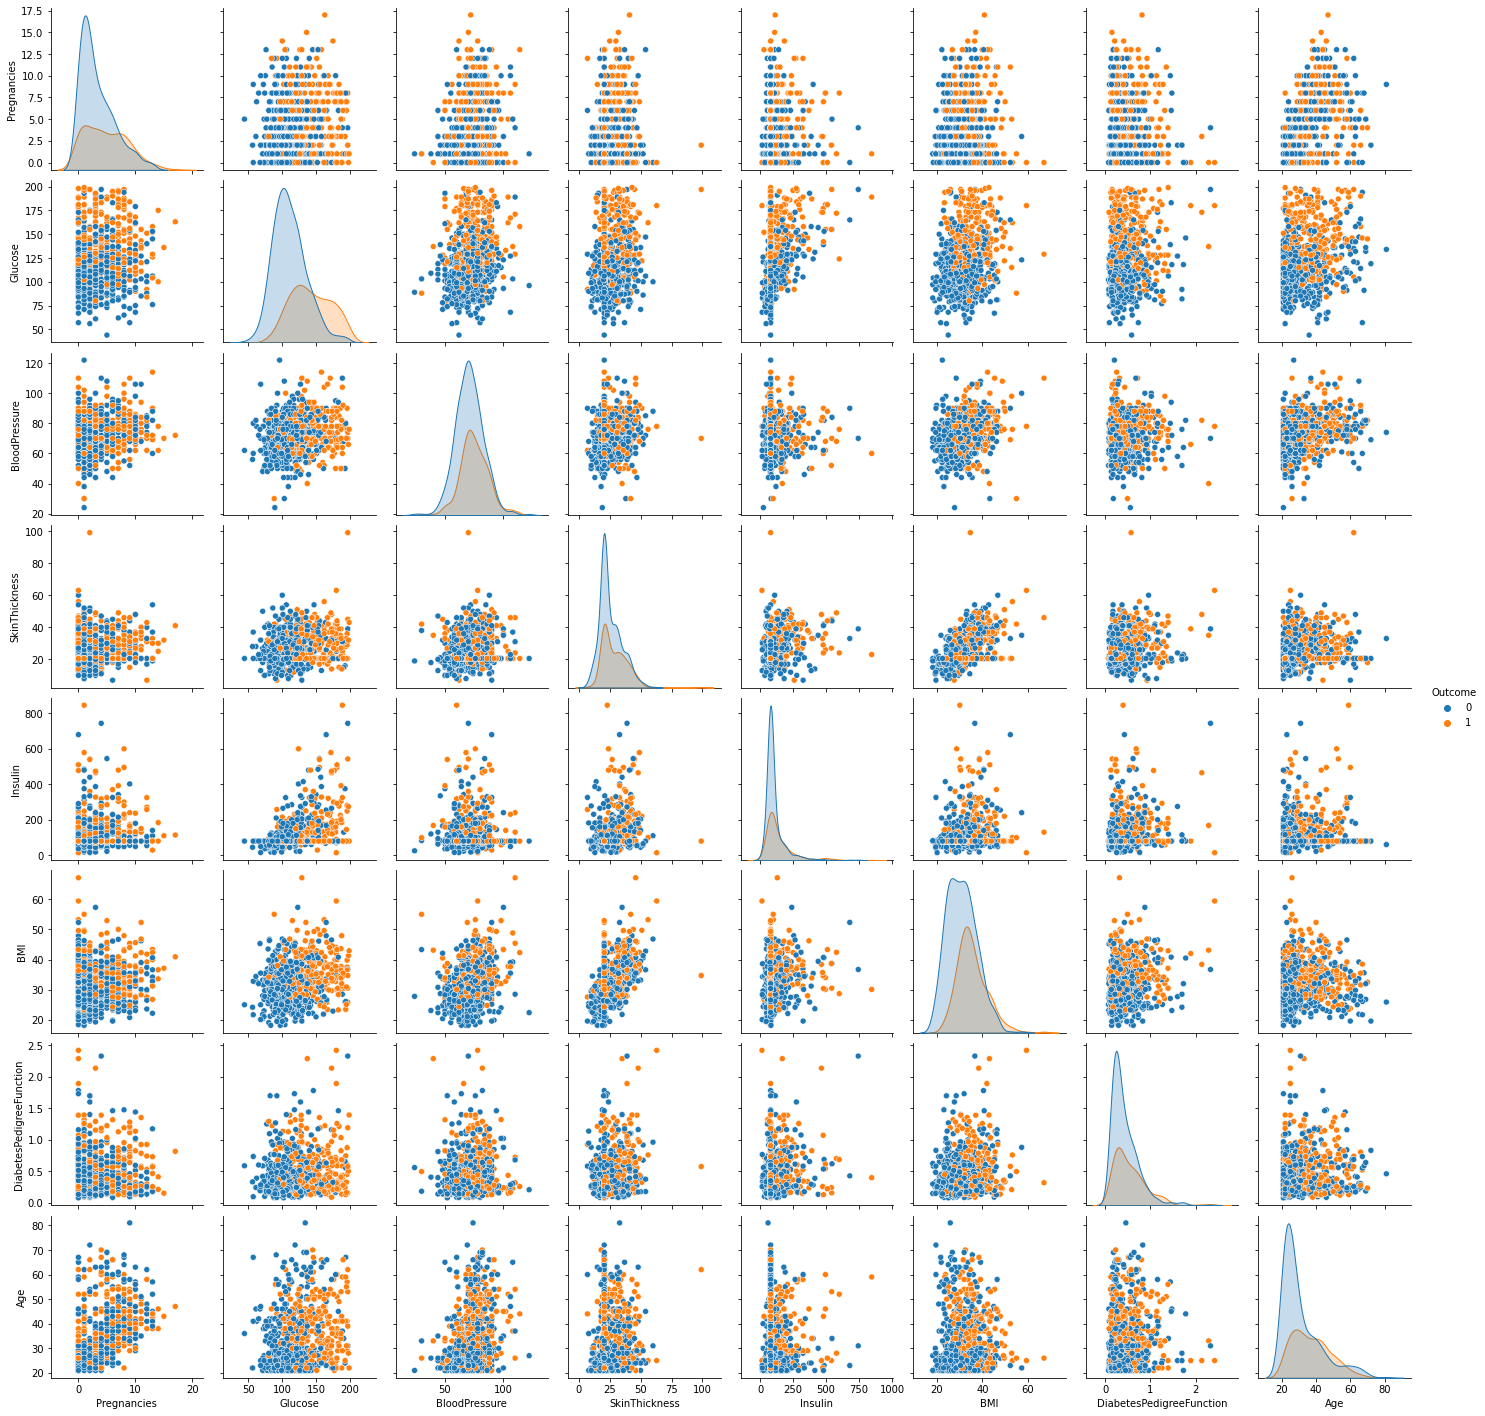

In [32]:
sns.pairplot(data=dt,hue="Outcome")
plt.show()

Analyzing relationship between variables

Correlation Analysis

In [33]:
import seaborn as sns


In [34]:
corrmat = dt.corr()

In [35]:
top_corr_features = corrmat.index

In [36]:
plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

Plot Heat Map

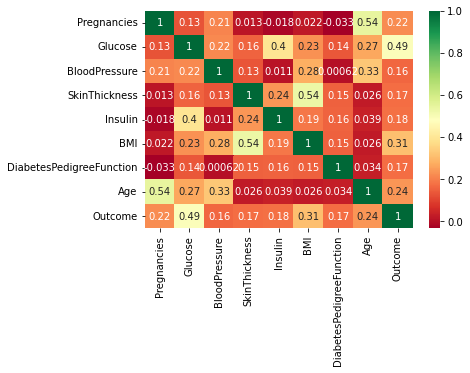

In [37]:
g = sns.heatmap(dt[top_corr_features].corr(),annot=True, cmap="RdYlGn")

Split Dataframe into x andy

In [38]:
target_name = "Outcome"

In [39]:
y = dt[target_name]

In [40]:
x = dt.drop(target_name,axis=1)

In [41]:
x.shape

(769, 8)

In [42]:
x.shape

(769, 8)

In [43]:
y.shape

(769,)

In [44]:
x.head()
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

Apply Feature Scaling

In [131]:
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))

**TRAIN TEST SPLIT**

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(x, y, test_size = 0.2, random_state = 7)

In [47]:
X_train.shape, y_train.shape 

((615, 8), (615,))

In [48]:
X_test.shape, y_test.shape

((154, 8), (154,))

**BUILD CLASSIFICATION ALGORITHM**
1. Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = "liblinear", multi_class = "ovr")

2. KNeighborsclassifier(KNN)

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train )

KNeighborsClassifier()

3. Naive- Bayes Classifier

In [51]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train )

GaussianNB()

4. Support Vector Machine(SVM)

In [52]:
#modify
from sklearn.svm import SVC
sv = SVC(kernel='linear')
sv.fit(X_train, y_train )


SVC(kernel='linear')

5. Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier
DTT = DecisionTreeClassifier()
DTT.fit(X_train, y_train )

DecisionTreeClassifier()

6. Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train )

RandomForestClassifier()

**MAKING PREDICTION**

MAKING PREDICTION ON TEST BY USING LOGISTIC REGRESSION 

In [55]:
lr.fit(X_test,y_test)
lr_pred = lr.predict(X_test)

In [56]:
lr_pred.shape

(154,)

Making Prediction On Test Using KNN

In [57]:
knn_pred=knn.predict(X_test)


In [58]:
knn_pred.shape

(154,)

Making Prediction On Test Using naive Bayes

In [59]:
nb_pred = nb.predict(X_test)

In [60]:
nb_pred.shape

(154,)

Making Prediction On Test Using SVM

In [61]:
sv_pred = sv.predict(X_test)

Making Prediction On Test Using Decision Tree

In [62]:
DTT_pred=DTT.predict(X_test)
                     
   

Making Prediction On Test Using Random forest

In [63]:
rf_pred=rf.predict(X_test)

#10.Model evaluation

**Train score and test score of logistic regression**

In [64]:
from sklearn.metrics import accuracy_score
print("Train accuracy of logistic Regression ",lr.score(X_train,y_train)*100)
print("Accuracy (Test) score of Logistic regression",lr.score(X_test,y_test)*100)
print("Accuracy (Test) score of Logistic regression",accuracy_score(y_test,lr_pred)*100)

Train accuracy of logistic Regression  75.28455284552845
Accuracy (Test) score of Logistic regression 83.11688311688312
Accuracy (Test) score of Logistic regression 83.11688311688312


**Knn**

In [65]:
from sklearn.metrics import accuracy_score
print("Train accuracy of KNN ",knn.score(X_train,y_train)*100)
print("Accuracy (Test) score of KNN",knn.score(X_test,y_test)*100)
print("Accuracy (Test) score of KNN",accuracy_score(y_test,knn_pred)*100)

Train accuracy of KNN  84.22764227642277
Accuracy (Test) score of KNN 72.07792207792207
Accuracy (Test) score of KNN 72.07792207792207


In [66]:

print("Train accuracy of Naive Bayes ",nb.score(X_train,y_train)*100)
print("Accuracy (Test) score of Naive Bayes",nb.score(X_test,y_test)*100)
print("Accuracy (Test) score of Naive Bayes",accuracy_score(y_test,nb_pred)*100)

Train accuracy of Naive Bayes  74.14634146341463
Accuracy (Test) score of Naive Bayes 75.97402597402598
Accuracy (Test) score of Naive Bayes 75.97402597402598


In [67]:
print("Train accuracy of SVM ",sv.score(X_train,y_train)*100)
print("Accuracy (Test) score of SVM",sv.score(X_test,y_test)*100)
print("Accuracy (Test) score of SVM",accuracy_score(y_test,sv_pred)*100)

Train accuracy of SVM  77.07317073170732
Accuracy (Test) score of SVM 79.87012987012987
Accuracy (Test) score of SVM 79.87012987012987


In [68]:
print("Train accuracy of Decision Tree ",DTT.score(X_train,y_train)*100)
print("Accuracy (Test) score of Decision TRee",DTT.score(X_test,y_test)*100)
print("Accuracy (Test) score of Decision tree",accuracy_score(y_test,DTT_pred)*100)

Train accuracy of Decision Tree  100.0
Accuracy (Test) score of Decision TRee 68.83116883116884
Accuracy (Test) score of Decision tree 68.83116883116884


In [69]:
print("Train accuracy of randon Forest ",rf.score(X_train,y_train)*100)
print("Accuracy (Test) score of randon Forest",rf.score(X_test,y_test)*100)
print("Accuracy (Test) score of randon Forest",accuracy_score(y_test,rf_pred)*100)

Train accuracy of randon Forest  100.0
Accuracy (Test) score of randon Forest 77.92207792207793
Accuracy (Test) score of randon Forest 77.92207792207793


**10.2 Confusion Matrix**

*Confusion Matrix of "Logistic Regression"*

In [70]:
from sklearn.metrics import classification_report,confusion_matrix
cm=confusion_matrix(y_test,lr_pred)
cm

array([[89, 11],
       [15, 39]])

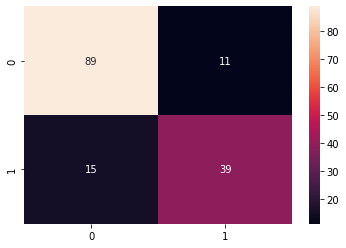

In [71]:
sns.heatmap(confusion_matrix(y_test,lr_pred),annot=True,fmt="d")

In [129]:
print('Classification Report Logistic Regression:\n',classification_report(y_test,lr_pred,digits=4))

Classification Report Logistic Regression:
               precision    recall  f1-score   support

           0     0.8558    0.8900    0.8725       100
           1     0.7800    0.7222    0.7500        54

    accuracy                         0.8312       154
   macro avg     0.8179    0.8061    0.8113       154
weighted avg     0.8292    0.8312    0.8296       154



In [73]:
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]

In [74]:
TN,FP,FN,TP

(89, 11, 15, 39)

In [75]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
cm=confusion_matrix(y_test,lr_pred)
print('TN-True Negative {}'.format(cm[0,0]))
print('FP-False Negative {}'.format(cm[0,1]))
print('FN-False  Negative {}'.format(cm[1,0]))
print('TP-True Positive {}'.format(cm[1,1]))
print('Accuracy Rate:{}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))*100))
print('Miscalculation Rate:{}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))*100))

TN-True Negative 89
FP-False Negative 11
FN-False  Negative 15
TP-True Positive 39
Accuracy Rate:83.11688311688312
Miscalculation Rate:16.883116883116884


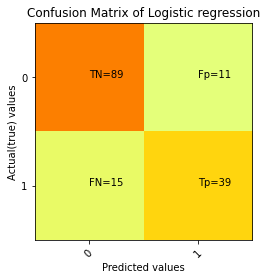

In [76]:
import matplotlib.pyplot as plt
plt.clf()
plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Wistia)
classNames=['0','1']
plt.title('Confusion Matrix of Logistic regression')
plt.ylabel('Actual(true) values')
plt.xlabel('Predicted values')
tick_marks=np.arange(len(classNames))
plt.xticks(tick_marks,classNames,rotation=45)
plt.yticks(tick_marks,classNames)
s=[['TN','Fp'],['FN','Tp']]
for i in range(2):
  for j in range(2):
    plt.text(j,i,str(s[i][j])+"="+str(cm[i][j]))

plt.show()

In [77]:
pd.crosstab(y_test,lr_pred,margins=False)


col_0,0,1
Outcome,,
0,89,11
1,15,39


In [78]:
pd.crosstab(y_test,lr_pred,margins=True)


col_0,0,1,All
Outcome,,,
0,89,11,100
1,15,39,54
All,104,50,154


In [79]:
pd.crosstab(y_test,lr_pred,rownames=['Actual values'],colnames=['Predicted values'],margins=True)


Predicted values,0,1,All
Actual values,,,
0,89,11,100
1,15,39,54
All,104,50,154


# PRECISON

In [80]:
TP,FP

(39, 11)

In [81]:
Precision=TP/(TP+FP)
Precision

0.78

In [82]:
precision_Score =TP/float(TP+FP)*100
print('Precision score:{0:0.4f}'.format(precision_Score))

Precision score:78.0000


In [83]:
from sklearn.metrics import precision_score
print('precison score is ',precision_score(y_test,lr_pred)*100)
print('Micro Average precision score is',precision_score(y_test,lr_pred,average='micro')*100)
print('Macro Average precision score is',precision_score(y_test,lr_pred,average='macro')*100)
print('weighted Average precision score is',precision_score(y_test,lr_pred,average='weighted')*100)
print('non weighted  precision score is',precision_score(y_test,lr_pred,average=None)*100)

precison score is  78.0
Micro Average precision score is 83.11688311688312
Macro Average precision score is 81.78846153846153
weighted Average precision score is 82.92007992007991
non weighted  precision score is [85.57692308 78.        ]


print('Classification report of Logistic Regression:\n',classification_report(y_train,lr_pred,digits=4))

# Recall(TPR)

In [85]:
recall_score=TP/float(TP+FN)*100
print('Recall score',recall_score)

Recall score 72.22222222222221


In [86]:
TP,FN

(39, 15)

In [87]:
from sklearn.metrics import recall_score
print('Recall or Sensitivity score',recall_score(y_test,lr_pred)*100)

Recall or Sensitivity score 72.22222222222221


In [88]:
print('Micro Average recall score is',recall_score(y_test,lr_pred,average='micro')*100)
print('Macro Average recall score is',recall_score(y_test,lr_pred,average='macro')*100)
print('weighted Average recall score is',recall_score(y_test,lr_pred,average='weighted')*100)
print('non weighted  recall score is',recall_score(y_test,lr_pred,average=None)*100)

Micro Average recall score is 83.11688311688312
Macro Average recall score is 80.61111111111111
weighted Average recall score is 83.11688311688312
non weighted  recall score is [89.         72.22222222]


In [89]:
print('Classification of Logistic regression ',classification_report(y_test,lr_pred,digits=4))

Classification of Logistic regression                precision    recall  f1-score   support

           0     0.8558    0.8900    0.8725       100
           1     0.7800    0.7222    0.7500        54

    accuracy                         0.8312       154
   macro avg     0.8179    0.8061    0.8113       154
weighted avg     0.8292    0.8312    0.8296       154



Classification report of Logistic Regression on trained data

In [90]:
print('Classification of Logistic regression ',classification_report(y_test,lr_pred,digits=4))

Classification of Logistic regression                precision    recall  f1-score   support

           0     0.8558    0.8900    0.8725       100
           1     0.7800    0.7222    0.7500        54

    accuracy                         0.8312       154
   macro avg     0.8179    0.8061    0.8113       154
weighted avg     0.8292    0.8312    0.8296       154



**False Positive rate**

In [91]:
FPR=FP/float(FP+TN)
print('False positive rate :{0:0.4f}'.format(FPR))

False positive rate :0.1100


In [92]:
FP,TN

(11, 89)

**Specificity**

In [93]:
specificity =TN/(TN+FP)*100
print('Specificity:{0:0.4f}'.format(specificity))

Specificity:89.0000


**F1-Score**

In [94]:
from sklearn.metrics import f1_score
print('f1_score of macro',f1_score(y_test,lr_pred)*100)

f1_score of macro 75.00000000000001


In [95]:
print('Micro Average F1 score is',f1_score(y_test,lr_pred,average='micro')*100)
print('Macro Average F1 score is',f1_score(y_test,lr_pred,average='macro')*100)
print('weighted Average f1 score is',f1_score(y_test,lr_pred,average='weighted')*100)
print('non weighted  f1 score is',f1_score(y_test,lr_pred,average=None)*100)

Micro Average F1 score is 83.11688311688312
Macro Average F1 score is 81.12745098039215
weighted Average f1 score is 82.95772854596383
non weighted  f1 score is [87.25490196 75.        ]


Classification Report of Logistic regression

In [96]:
from sklearn.metrics import classification_report
print('Classification report of Logistic Regression:\n',classification_report(y_test,lr_pred,digits=4))

Classification report of Logistic Regression:
               precision    recall  f1-score   support

           0     0.8558    0.8900    0.8725       100
           1     0.7800    0.7222    0.7500        54

    accuracy                         0.8312       154
   macro avg     0.8179    0.8061    0.8113       154
weighted avg     0.8292    0.8312    0.8296       154



**ROC Curve & ROC AUC**

In [97]:
auc=roc_auc_score(y_test,lr_pred)
print("ROC AUC SCORE of Logistic Regression is",auc)

ROC AUC SCORE of Logistic Regression is 0.8061111111111111


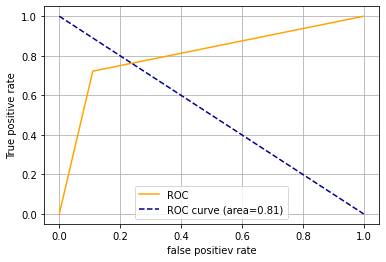

In [98]:
fpr,tpr,thresholds =roc_curve(y_test,lr_pred)
plt.plot(fpr,tpr,color='orange', label='ROC')
plt.plot([0,1],[1,0],color='darkblue',linestyle='--',label='ROC curve (area=%0.2f)'%auc)
plt.xlabel('false positiev rate')
plt.ylabel('True positive rate')
plt.legend()
plt.grid()
plt.show()

Confusion matrix of KNN

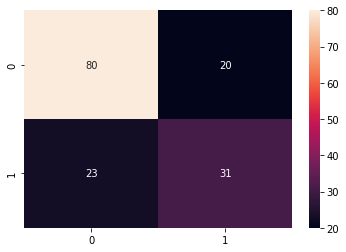

In [99]:
sns.heatmap(confusion_matrix(y_test,knn_pred),annot=True,fmt='d')

In [100]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
cm=confusion_matrix(y_test,knn_pred)
print('TN-True Negative {}'.format(cm[0,0]))
print('FP-False Negative {}'.format(cm[0,1]))
print('FN-False  Negative {}'.format(cm[1,0]))
print('TP-True Positive {}'.format(cm[1,1]))
print('Accuracy Rate:{}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))*100))
print('Miscalculation Rate:{}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))*100))

TN-True Negative 80
FP-False Negative 20
FN-False  Negative 23
TP-True Positive 31
Accuracy Rate:72.07792207792207
Miscalculation Rate:27.92207792207792


In [101]:
print('Classification report of KNN:\n',classification_report(y_test,knn_pred,digits=4))

Classification report of KNN:
               precision    recall  f1-score   support

           0     0.7767    0.8000    0.7882       100
           1     0.6078    0.5741    0.5905        54

    accuracy                         0.7208       154
   macro avg     0.6923    0.6870    0.6893       154
weighted avg     0.7175    0.7208    0.7189       154



Area under curve of KNN

In [102]:
auc=roc_auc_score(y_test,knn_pred)
print("ROC AUC SCORE of KNN is",auc)

ROC AUC SCORE of KNN is 0.6870370370370371


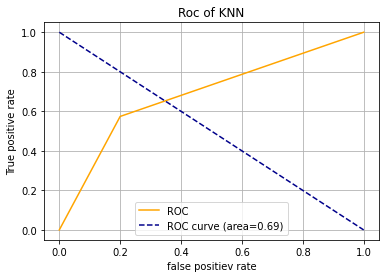

In [103]:
fpr,tpr,thresholds =roc_curve(y_test,knn_pred)
plt.plot(fpr,tpr,color='orange', label='ROC')
plt.plot([0,1],[1,0],color='darkblue',linestyle='--',label='ROC curve (area=%0.2f)'%auc)
plt.xlabel('false positiev rate')
plt.ylabel('True positive rate')
plt.title('Roc of KNN')
plt.legend()
plt.grid()
plt.show()

Confusion matrix of naive bayes

In [104]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
cm=confusion_matrix(y_test,nb_pred)
print('TN-True Negative {}'.format(cm[0,0]))
print('FP-False Negative {}'.format(cm[0,1]))
print('FN-False  Negative {}'.format(cm[1,0]))
print('TP-True Positive {}'.format(cm[1,1]))
print('Accuracy Rate:{}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))*100))
print('Miscalculation Rate:{}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))*100))

TN-True Negative 83
FP-False Negative 17
FN-False  Negative 20
TP-True Positive 34
Accuracy Rate:75.97402597402598
Miscalculation Rate:24.025974025974026


In [105]:
print('Classification report of Naive Bayes:\n',classification_report(y_test,nb_pred,digits=4))

Classification report of Naive Bayes:
               precision    recall  f1-score   support

           0     0.8058    0.8300    0.8177       100
           1     0.6667    0.6296    0.6476        54

    accuracy                         0.7597       154
   macro avg     0.7362    0.7298    0.7327       154
weighted avg     0.7570    0.7597    0.7581       154



ROC of NB

In [106]:
auc=roc_auc_score(y_test,nb_pred)
print("ROC AUC SCORE of NB is",auc)

ROC AUC SCORE of NB is 0.7298148148148148


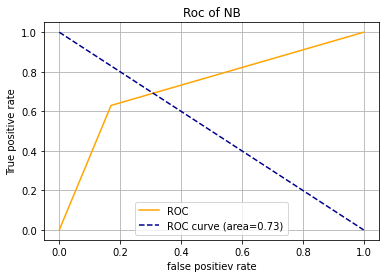

In [107]:
fpr,tpr,thresholds =roc_curve(y_test,nb_pred)
plt.plot(fpr,tpr,color='orange', label='ROC')
plt.plot([0,1],[1,0],color='darkblue',linestyle='--',label='ROC curve (area=%0.2f)'%auc)
plt.xlabel('false positiev rate')
plt.ylabel('True positive rate')
plt.title('Roc of NB')
plt.legend()
plt.grid()
plt.show()

confusion matrix of SVM

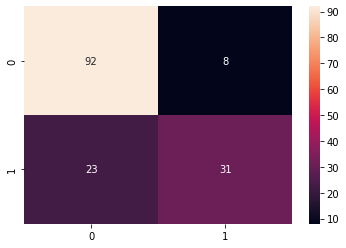

In [108]:
sns.heatmap(confusion_matrix(y_test,sv_pred),annot=True,fmt='d')

In [109]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
cm=confusion_matrix(y_test,sv_pred)
print('TN-True Negative {}'.format(cm[0,0]))
print('FP-False Negative {}'.format(cm[0,1]))
print('FN-False  Negative {}'.format(cm[1,0]))
print('TP-True Positive {}'.format(cm[1,1]))
print('Accuracy Rate:{}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))*100))
print('Miscalculation Rate:{}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))*100))

TN-True Negative 92
FP-False Negative 8
FN-False  Negative 23
TP-True Positive 31
Accuracy Rate:79.87012987012987
Miscalculation Rate:20.12987012987013


In [110]:
print('Classification report of SVM:\n',classification_report(y_test,sv_pred,digits=4))

Classification report of SVM:
               precision    recall  f1-score   support

           0     0.8000    0.9200    0.8558       100
           1     0.7949    0.5741    0.6667        54

    accuracy                         0.7987       154
   macro avg     0.7974    0.7470    0.7612       154
weighted avg     0.7982    0.7987    0.7895       154



ROC Auc of SVM

In [111]:
auc=roc_auc_score(y_test,sv_pred)
print("ROC AUC SCORE of SVm is",auc*100)

ROC AUC SCORE of SVm is 74.70370370370371


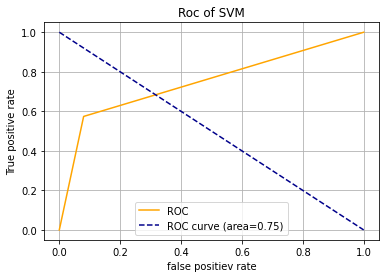

In [112]:
fpr,tpr,thresholds =roc_curve(y_test,sv_pred)
plt.plot(fpr,tpr,color='orange', label='ROC')
plt.plot([0,1],[1,0],color='darkblue',linestyle='--',label='ROC curve (area=%0.2f)'%auc)
plt.xlabel('false positiev rate')
plt.ylabel('True positive rate')
plt.title('Roc of SVM')
plt.legend()
plt.grid()
plt.show()

Confusion matrix of decision tree

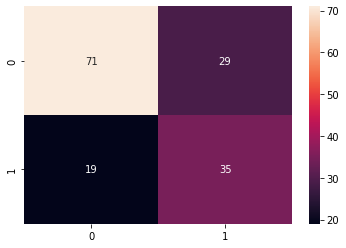

In [113]:
sns.heatmap(confusion_matrix(y_test,DTT_pred),annot=True,fmt='d')

In [114]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
cm=confusion_matrix(y_test,DTT_pred)
print('TN-True Negative {}'.format(cm[0,0]))
print('FP-False Negative {}'.format(cm[0,1]))
print('FN-False  Negative {}'.format(cm[1,0]))
print('TP-True Positive {}'.format(cm[1,1]))
print('Accuracy Rate:{}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))*100))
print('Miscalculation Rate:{}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))*100))

TN-True Negative 71
FP-False Negative 29
FN-False  Negative 19
TP-True Positive 35
Accuracy Rate:68.83116883116884
Miscalculation Rate:31.16883116883117


In [115]:
print('Classification report of Decison tree:\n',classification_report(y_test,DTT_pred,digits=4))

Classification report of Decison tree:
               precision    recall  f1-score   support

           0     0.7889    0.7100    0.7474       100
           1     0.5469    0.6481    0.5932        54

    accuracy                         0.6883       154
   macro avg     0.6679    0.6791    0.6703       154
weighted avg     0.7040    0.6883    0.6933       154



In [116]:
auc=roc_auc_score(y_test,DTT_pred)
print("ROC AUC SCORE of DTT is",auc*100)

ROC AUC SCORE of DTT is 67.9074074074074


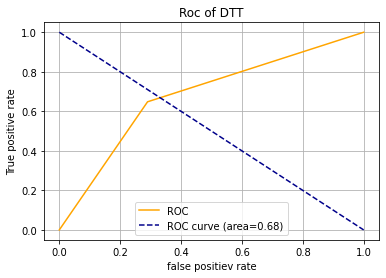

In [117]:
fpr,tpr,thresholds =roc_curve(y_test,DTT_pred)
plt.plot(fpr,tpr,color='orange', label='ROC')
plt.plot([0,1],[1,0],color='darkblue',linestyle='--',label='ROC curve (area=%0.2f)'%auc)
plt.xlabel('false positiev rate')
plt.ylabel('True positive rate')
plt.title('Roc of DTT')
plt.legend()
plt.grid()
plt.show()

confusion matrix of random forest

In [118]:
from sklearn.metrics import classification_report
print('Classification report of Random Forest :\n',classification_report(y_test,rf_pred,digits=4))

Classification report of Random Forest :
               precision    recall  f1-score   support

           0     0.8113    0.8600    0.8350       100
           1     0.7083    0.6296    0.6667        54

    accuracy                         0.7792       154
   macro avg     0.7598    0.7448    0.7508       154
weighted avg     0.7752    0.7792    0.7759       154



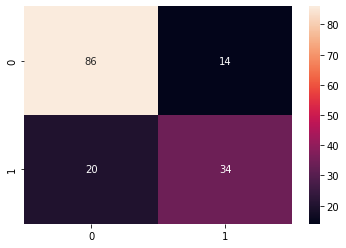

In [119]:
sns.heatmap(confusion_matrix(y_test,rf_pred),annot=True,fmt='d')

In [120]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
cm=confusion_matrix(y_test,rf_pred)
print('TN-True Negative {}'.format(cm[0,0]))
print('FP-False Negative {}'.format(cm[0,1]))
print('FN-False  Negative {}'.format(cm[1,0]))
print('TP-True Positive {}'.format(cm[1,1]))
print('Accuracy Rate:{}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))*100))
print('Miscalculation Rate:{}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))*100))

TN-True Negative 86
FP-False Negative 14
FN-False  Negative 20
TP-True Positive 34
Accuracy Rate:77.92207792207793
Miscalculation Rate:22.07792207792208


In [121]:
print('Classification report of Decison tree:\n',classification_report(y_test,rf_pred,digits=4))

Classification report of Decison tree:
               precision    recall  f1-score   support

           0     0.8113    0.8600    0.8350       100
           1     0.7083    0.6296    0.6667        54

    accuracy                         0.7792       154
   macro avg     0.7598    0.7448    0.7508       154
weighted avg     0.7752    0.7792    0.7759       154



In [122]:
auc=roc_auc_score(y_test,rf_pred)
print("ROC AUC SCORE of RF is",auc*100)

ROC AUC SCORE of RF is 74.48148148148148


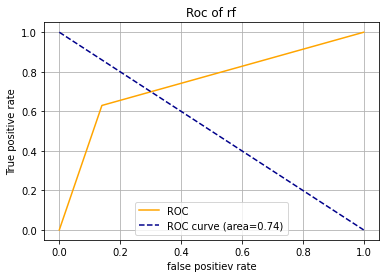

In [123]:
fpr,tpr,thresholds =roc_curve(y_test,rf_pred)
plt.plot(fpr,tpr,color='orange', label='ROC')
plt.plot([0,1],[1,0],color='darkblue',linestyle='--',label='ROC curve (area=%0.2f)'%auc)
plt.xlabel('false positiev rate')
plt.ylabel('True positive rate')
plt.title('Roc of rf')
plt.legend()
plt.grid()
plt.show()

End

In [124]:
import pickle


In [125]:
filename = 'svm_model.sav'
pickle.dump(sv, open(filename, 'wb'))

In [126]:
# loading the saved model
loaded_model = pickle.load(open('svm_model.sav', 'rb'))

In [127]:
# input_data = (10,	101,	76,	48,	180,	32.9,	0.171,	63	)
input_data = np.array([[10,	101,	76,	48,	180,	32.9,	0.171,	63]])
input_new = input_data.astype(float)
# changing the input_data to numpy array
# input_data_as_numpy_array = np.asarray(input_new)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_new.reshape(1,-1)

# std_data = scaler.transform(input_data_reshaped)

prediction = loaded_model.predict(input_data_reshaped )
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic
